# Data Analysis

## Importing necessary libraries and packages

In [3]:
!pip install pandas xlrd openpyxl xlsxwriter

In [4]:
!pip install --upgrade openpyxl

In [5]:
!pip install --upgrade ipywidgets jupyterlab_widgets

In [6]:
!pip install --upgrade plotly

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Converting xls to xlsx if required

In [9]:
def convert_xls_to_xlsx(file_path):
    if os.path.isfile(file_path) and file_path.lower().endswith(".xls"):
        xlsx_file = file_path.replace(".xls", ".xlsx") 

        df = pd.read_excel(file_path, engine="xlrd")

        df.to_excel(xlsx_file, index=False, engine="openpyxl")

        print(f"Converted '{file_path}' to '{xlsx_file}' successfully!")
        return xlsx_file
    else:
        print("The file is in proper format for further processing.")
        return None

file_path = "sample_data.xls" 
convert_xls_to_xlsx(file_path)


Converted 'sample_data.xls' to 'sample_data.xlsx' successfully!


'sample_data.xlsx'

## Loading the excel sheet and finding number of unique users

In [11]:
df = pd.read_excel("sample_data.xlsx")
df.head()

,Learning activity - Title,Learning activity - ID,Learning activity - Duration,Delivery Type,Learning Source Name,Learner - Name,Learner - Email,Learner - ID,Transcript status,Completion Date
0,Introduction to Artificial Intelligence,MDL-211,75.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-16T11:34:07Z
1,"Climate, Biodiversity, and Human Society (brou...",MDL-285,180.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T13:03:52Z
2,Beyond Conservation to Sustainability,MDL-288,60.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T13:45:44Z
3,Make an Impact with Data Analytics,MDL-289,90.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T14:00:09Z
4,Make an Impact with AI,MDL-290,90.0,eLearning,Moodle,Adit Dhiman,adxxx@gmail.com,3088627REG,Completed,2024-08-28T14:24:03Z


In [12]:
unique_users = df["Learner - ID"].nunique()
print(f"Number of Unique Users: {unique_users}")

Number of Unique Users: 4459


## No. of completed and inprogress activities using bar graph and pie charts

#### Bar Graph

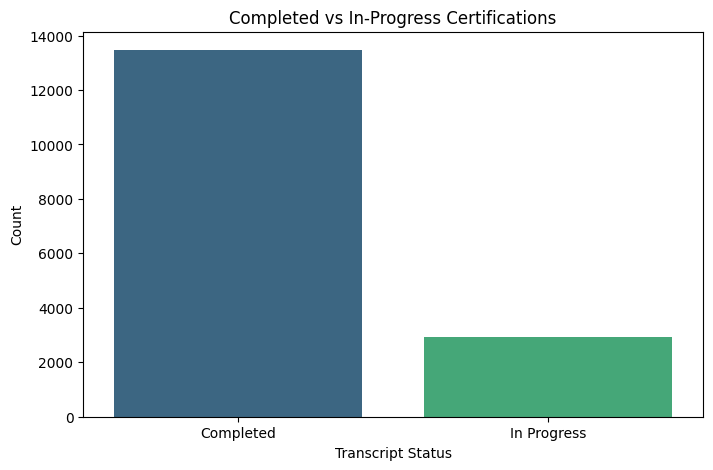

In [15]:
status_counts = df["Transcript status"].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.xlabel("Transcript Status")
plt.ylabel("Count")
plt.title("Completed vs In-Progress Certifications")
plt.show()

#### Pie Chart

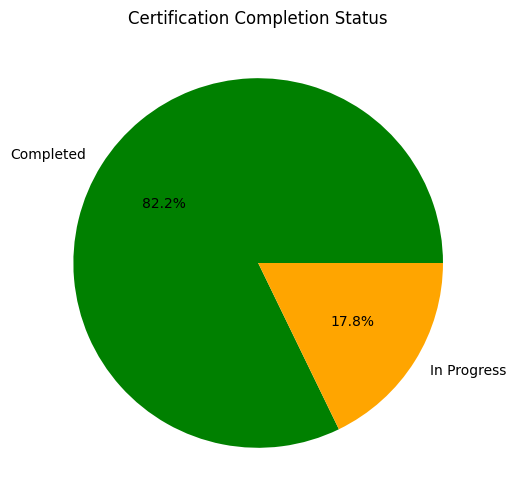

In [17]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", colors=["green", "orange"])
plt.title("Certification Completion Status")
plt.show()

### Issue faced:

> The exact number of candidates were not displayed for "Completed" and "In Progress"

> Solution done: Displayed number of candidates on each 

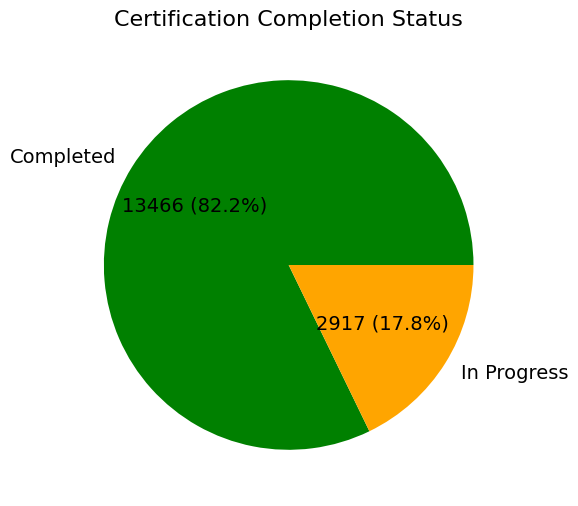

In [19]:
import matplotlib.pyplot as plt

status_counts = df["Transcript status"].value_counts()

def pie_label(pct, all_vals):
    absolute = int(round(pct / 100.0 * sum(all_vals)))  # Convert percentage to absolute count
    return f"{absolute} ({pct:.1f}%)"  # Format as "count (percentage%)"

plt.figure(figsize=(6, 6))  
plt.pie(
    status_counts, 
    labels=status_counts.index, 
    autopct=lambda pct: pie_label(pct, status_counts),  # Custom function for labels
    colors=["green", "orange"], 
    textprops={"fontsize": 14}  
)
plt.title("Certification Completion Status", fontsize=16)
plt.show()


## A table showing count of Completed/ All in progress / All Unique users Based on Quaterly Split

In [21]:
# Convert 'Completion Date' to datetime
df["Completion Date"] = pd.to_datetime(df["Completion Date"], errors="coerce")

# Extract quarters
df["Quarter"] = df["Completion Date"].dt.to_period("Q")


C:\Users\Admin\AppData\Local\Temp\ipykernel_11136\2114227541.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Quarter"] = df["Completion Date"].dt.to_period("Q")


In [23]:
new

Transcript status,Completed,Unique Users
Quarter,,
2024Q3,471,471
2024Q4,2761,2761
2025Q1,34,34


### Quarterly Split between Completed and In progress users

C:\Users\Admin\AppData\Local\Temp\ipykernel_11136\232236814.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Quarter"] = df["Completion Date"].dt.to_period("Q")


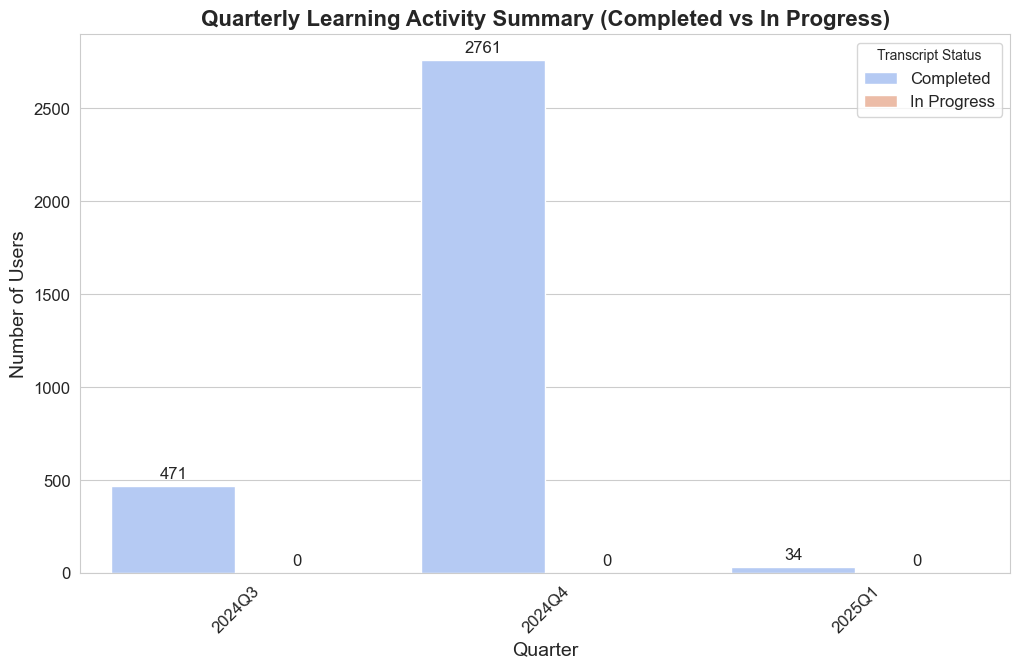

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Completion Date' to datetime
df["Completion Date"] = pd.to_datetime(df["Completion Date"], errors="coerce")

# Standardize 'Transcript status' column to remove extra spaces
df["Transcript status"] = df["Transcript status"].str.strip()

# Extract quarters
df["Quarter"] = df["Completion Date"].dt.to_period("Q")

# Create pivot table with 'Completed' and 'In Progress'
quarterly_summary = df.pivot_table(
    index="Quarter",
    columns="Transcript status",
    values="Learner - ID",
    aggfunc="nunique",
    fill_value=0
)

# Ensure 'Completed' and 'In Progress' columns exist
expected_statuses = ["Completed", "In Progress"]
for status in expected_statuses:
    if status not in quarterly_summary.columns:
        quarterly_summary[status] = 0  # Add missing column with zeros

# Reset index to make 'Quarter' a column
quarterly_summary = quarterly_summary.reset_index()

# Melt DataFrame for better visualization
quarterly_summary_melted = quarterly_summary.melt(id_vars="Quarter", var_name="Status", value_name="Count")

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(x="Quarter", y="Count", hue="Status", data=quarterly_summary_melted, palette="coolwarm")

plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Quarterly Learning Activity Summary (Completed vs In Progress)", fontsize=16, fontweight="bold")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3, fontsize=12)

plt.legend(title="Transcript Status", fontsize=12)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.show()


In [29]:
import pandas as pd

# Convert 'Completion Date' to datetime
df["Completion Date"] = pd.to_datetime(df["Completion Date"], errors="coerce")

# Standardize 'Transcript status' column to remove extra spaces
df["Transcript status"] = df["Transcript status"].str.strip()

# Extract quarters
df["Quarter"] = df["Completion Date"].dt.to_period("Q")

# Count 'In Progress' users per quarter
in_progress_counts = df[df["Transcript status"] == "In Progress"].groupby("Quarter")["Learner - ID"].nunique()

# Display the result
print(in_progress_counts)


Series([], Freq: Q-DEC, Name: Learner - ID, dtype: int64)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11136\2848583854.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Quarter"] = df["Completion Date"].dt.to_period("Q")


### Issue that was being faced:

> In Progress entries do not have a Quarter value as they were derived based on Completion Date. This is why they are not included in the pivot table.

> Solution done: assigned a default quarter using df["Quarter"].fillna(df["Quarter"].max(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11136\3493010961.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Quarter"] = df["Completion Date"].dt.to_period("Q")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11136\3493010961.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quarter"].fillna(df["Quarter"].max(), inplace=True)


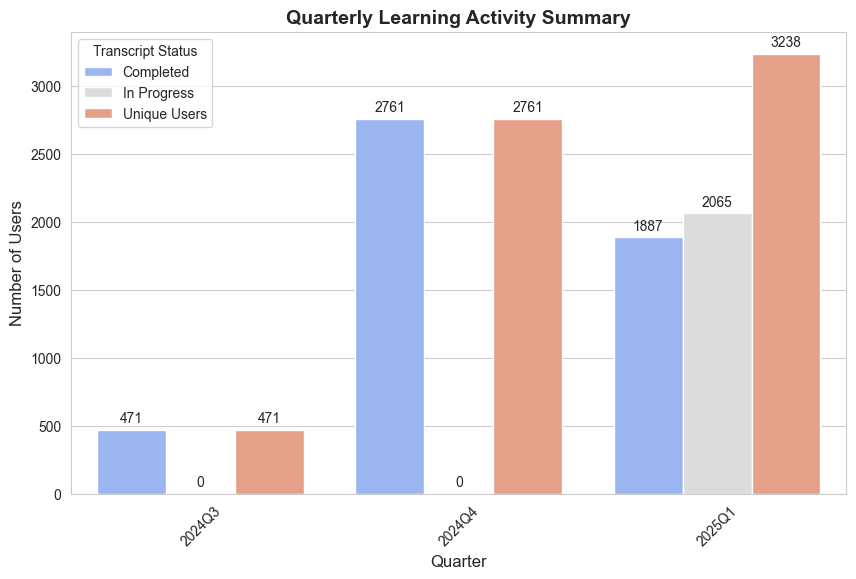

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Completion Date' to datetime format
df["Completion Date"] = pd.to_datetime(df["Completion Date"], errors="coerce")

# Extract quarters
df["Quarter"] = df["Completion Date"].dt.to_period("Q")

# Assign the latest available quarter for missing values
df["Quarter"].fillna(df["Quarter"].max(), inplace=True)

# Compute pivot table for completed and in-progress learners per quarter
quarterly_summary = df.pivot_table(
    index="Quarter",
    columns="Transcript status",
    values="Learner - ID",
    aggfunc="nunique",
    fill_value=0
)

# Ensure "Completed" and "In Progress" always exist in the table
quarterly_summary = quarterly_summary.reindex(columns=["Completed", "In Progress"], fill_value=0)

# Compute total unique users per quarter
quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()

# Reset index for plotting
quarterly_summary = quarterly_summary.reset_index()

# Reshape data for visualization
quarterly_summary_melted = quarterly_summary.melt(id_vars="Quarter", var_name="Status", value_name="Count")

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="Quarter", y="Count", hue="Status", data=quarterly_summary_melted, palette="coolwarm")

plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Quarterly Learning Activity Summary", fontsize=14, fontweight="bold")

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.legend(title="Transcript Status")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Progress tracking of top 20 most common learning activities

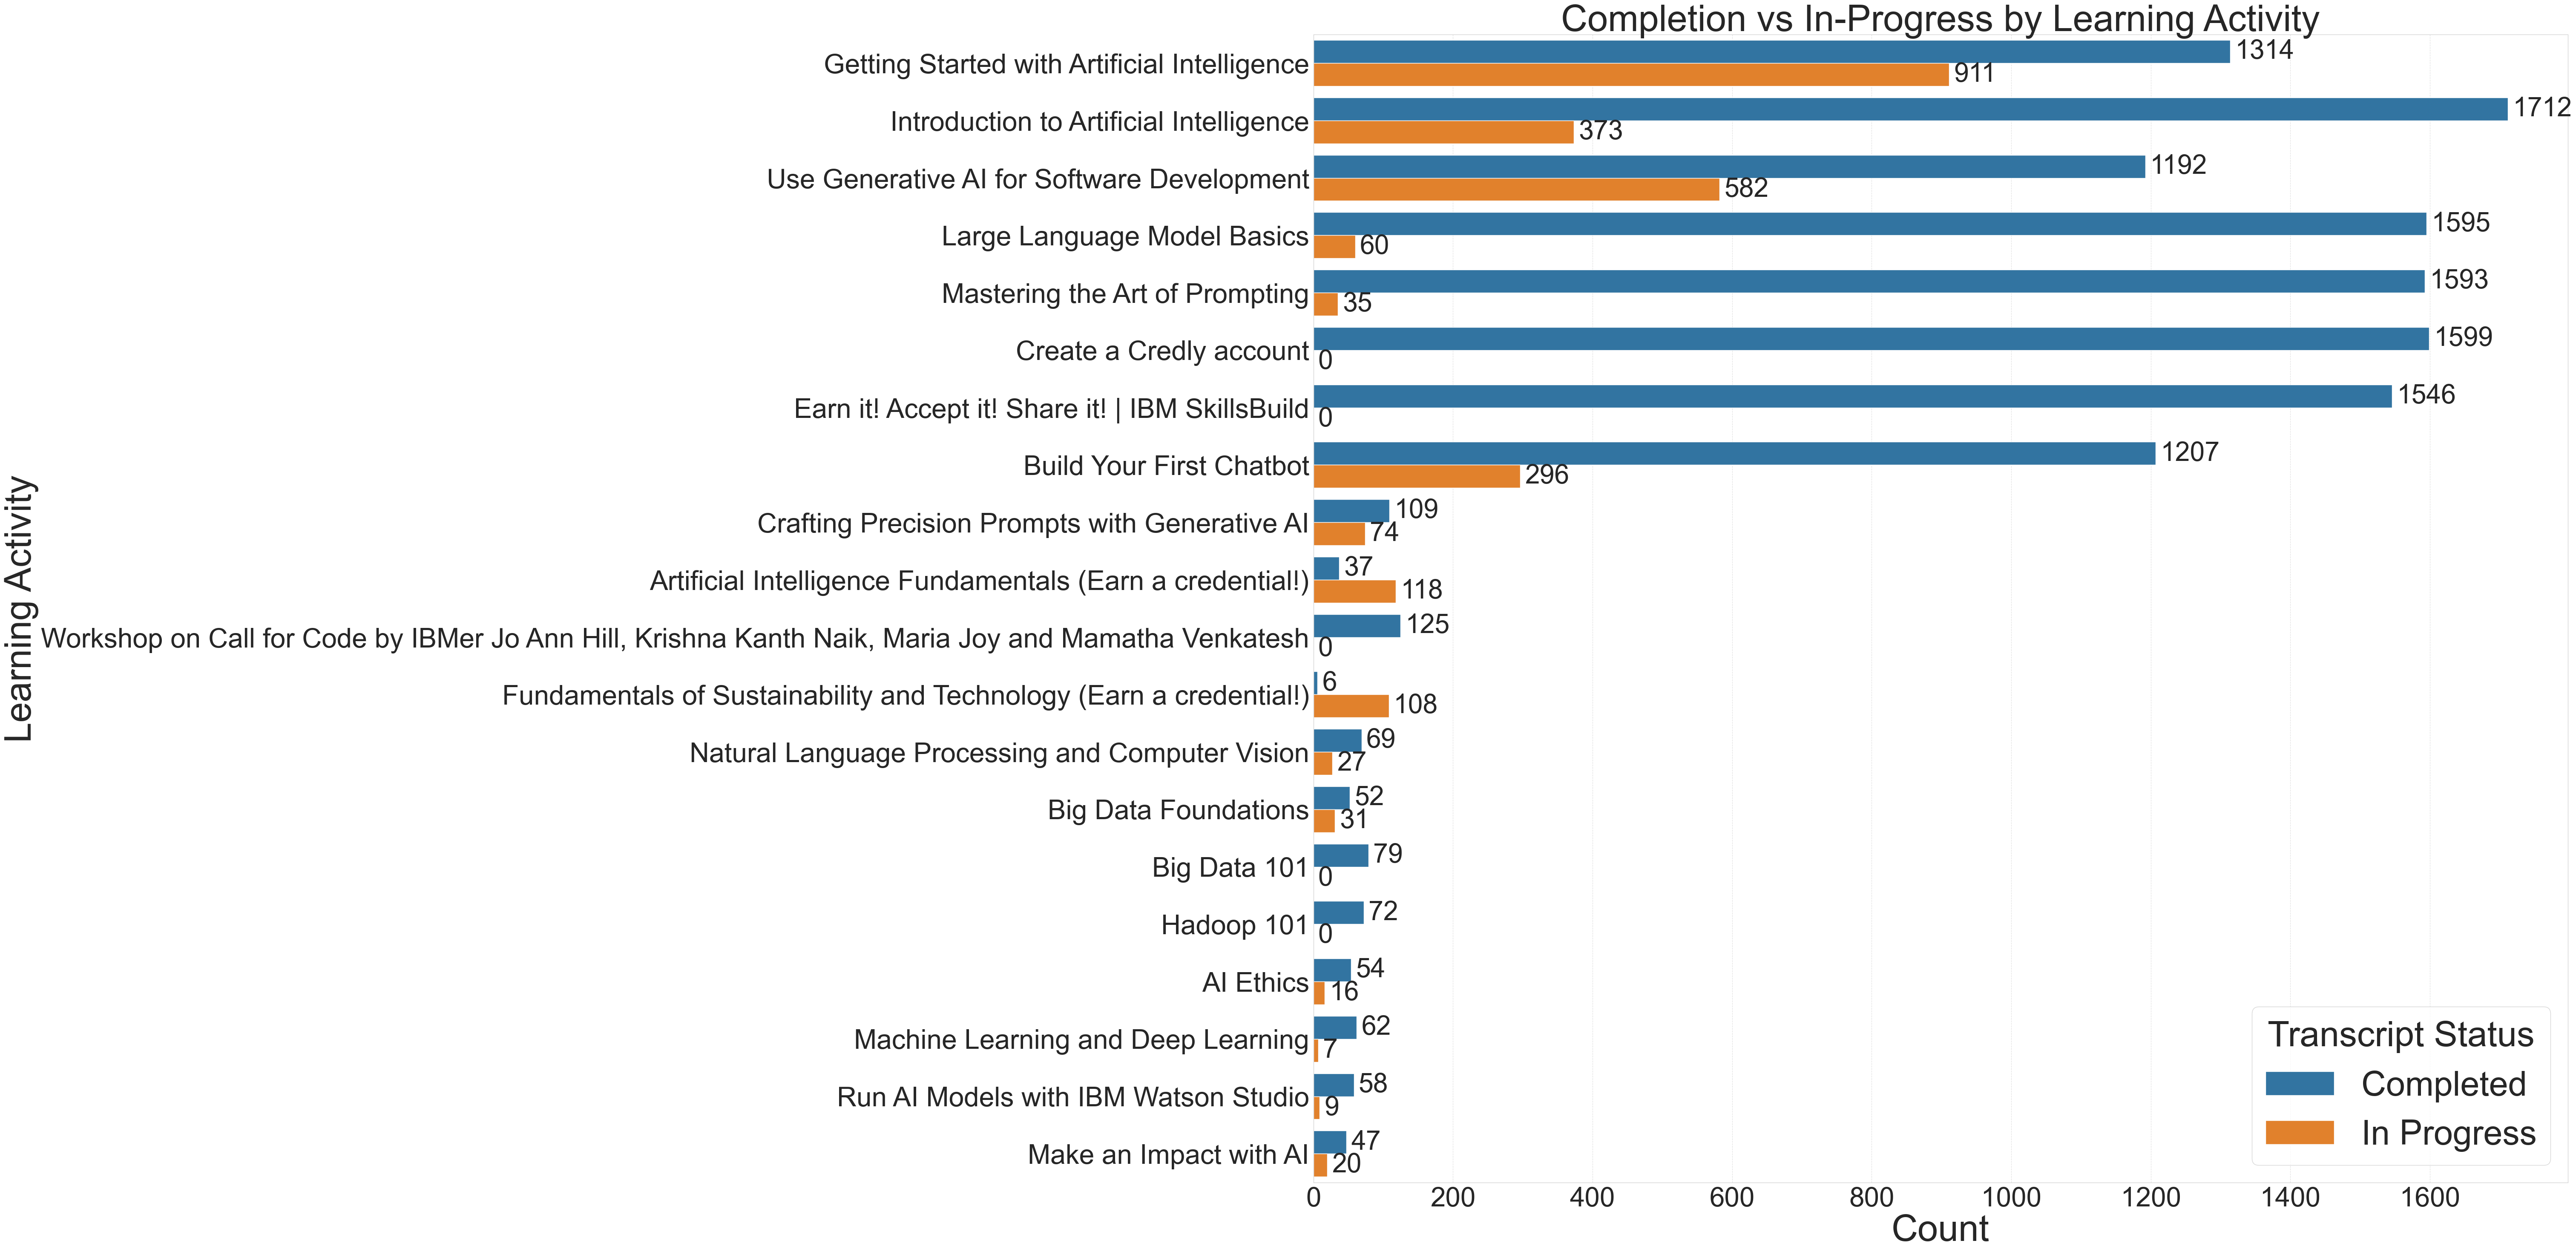

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 most frequent learning activities for better readability
top_activities = df["Learning activity - Title"].value_counts().index[:20]

plt.figure(figsize=(38, 35))  # Increased figure size
ax = sns.countplot(
    data=df[df["Learning activity - Title"].isin(top_activities)], 
    y="Learning activity - Title", 
    hue="Transcript status", 
    order=top_activities
)

# Add count labels next to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=8, fontsize=45)

# Increase font sizes for better readability
plt.xlabel("Count", fontsize=62)
plt.ylabel("Learning Activity", fontsize=62)
plt.title("Completion vs In-Progress by Learning Activity", fontsize=62)

# Adjust legend
plt.legend(title="Transcript Status", loc="lower right", fontsize=58, title_fontsize=60)

# Improve grid visibility
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Increase tick label size
plt.xticks(fontsize=46)
plt.yticks(fontsize=46)

plt.show()


### Issue faced:

> The progress tracking is very cluttered and not easy to analyse individual course details

> Solution: Created individual pie charts for each course. Also added a menu feature to get individual course  tracking

## Individual pie charts 

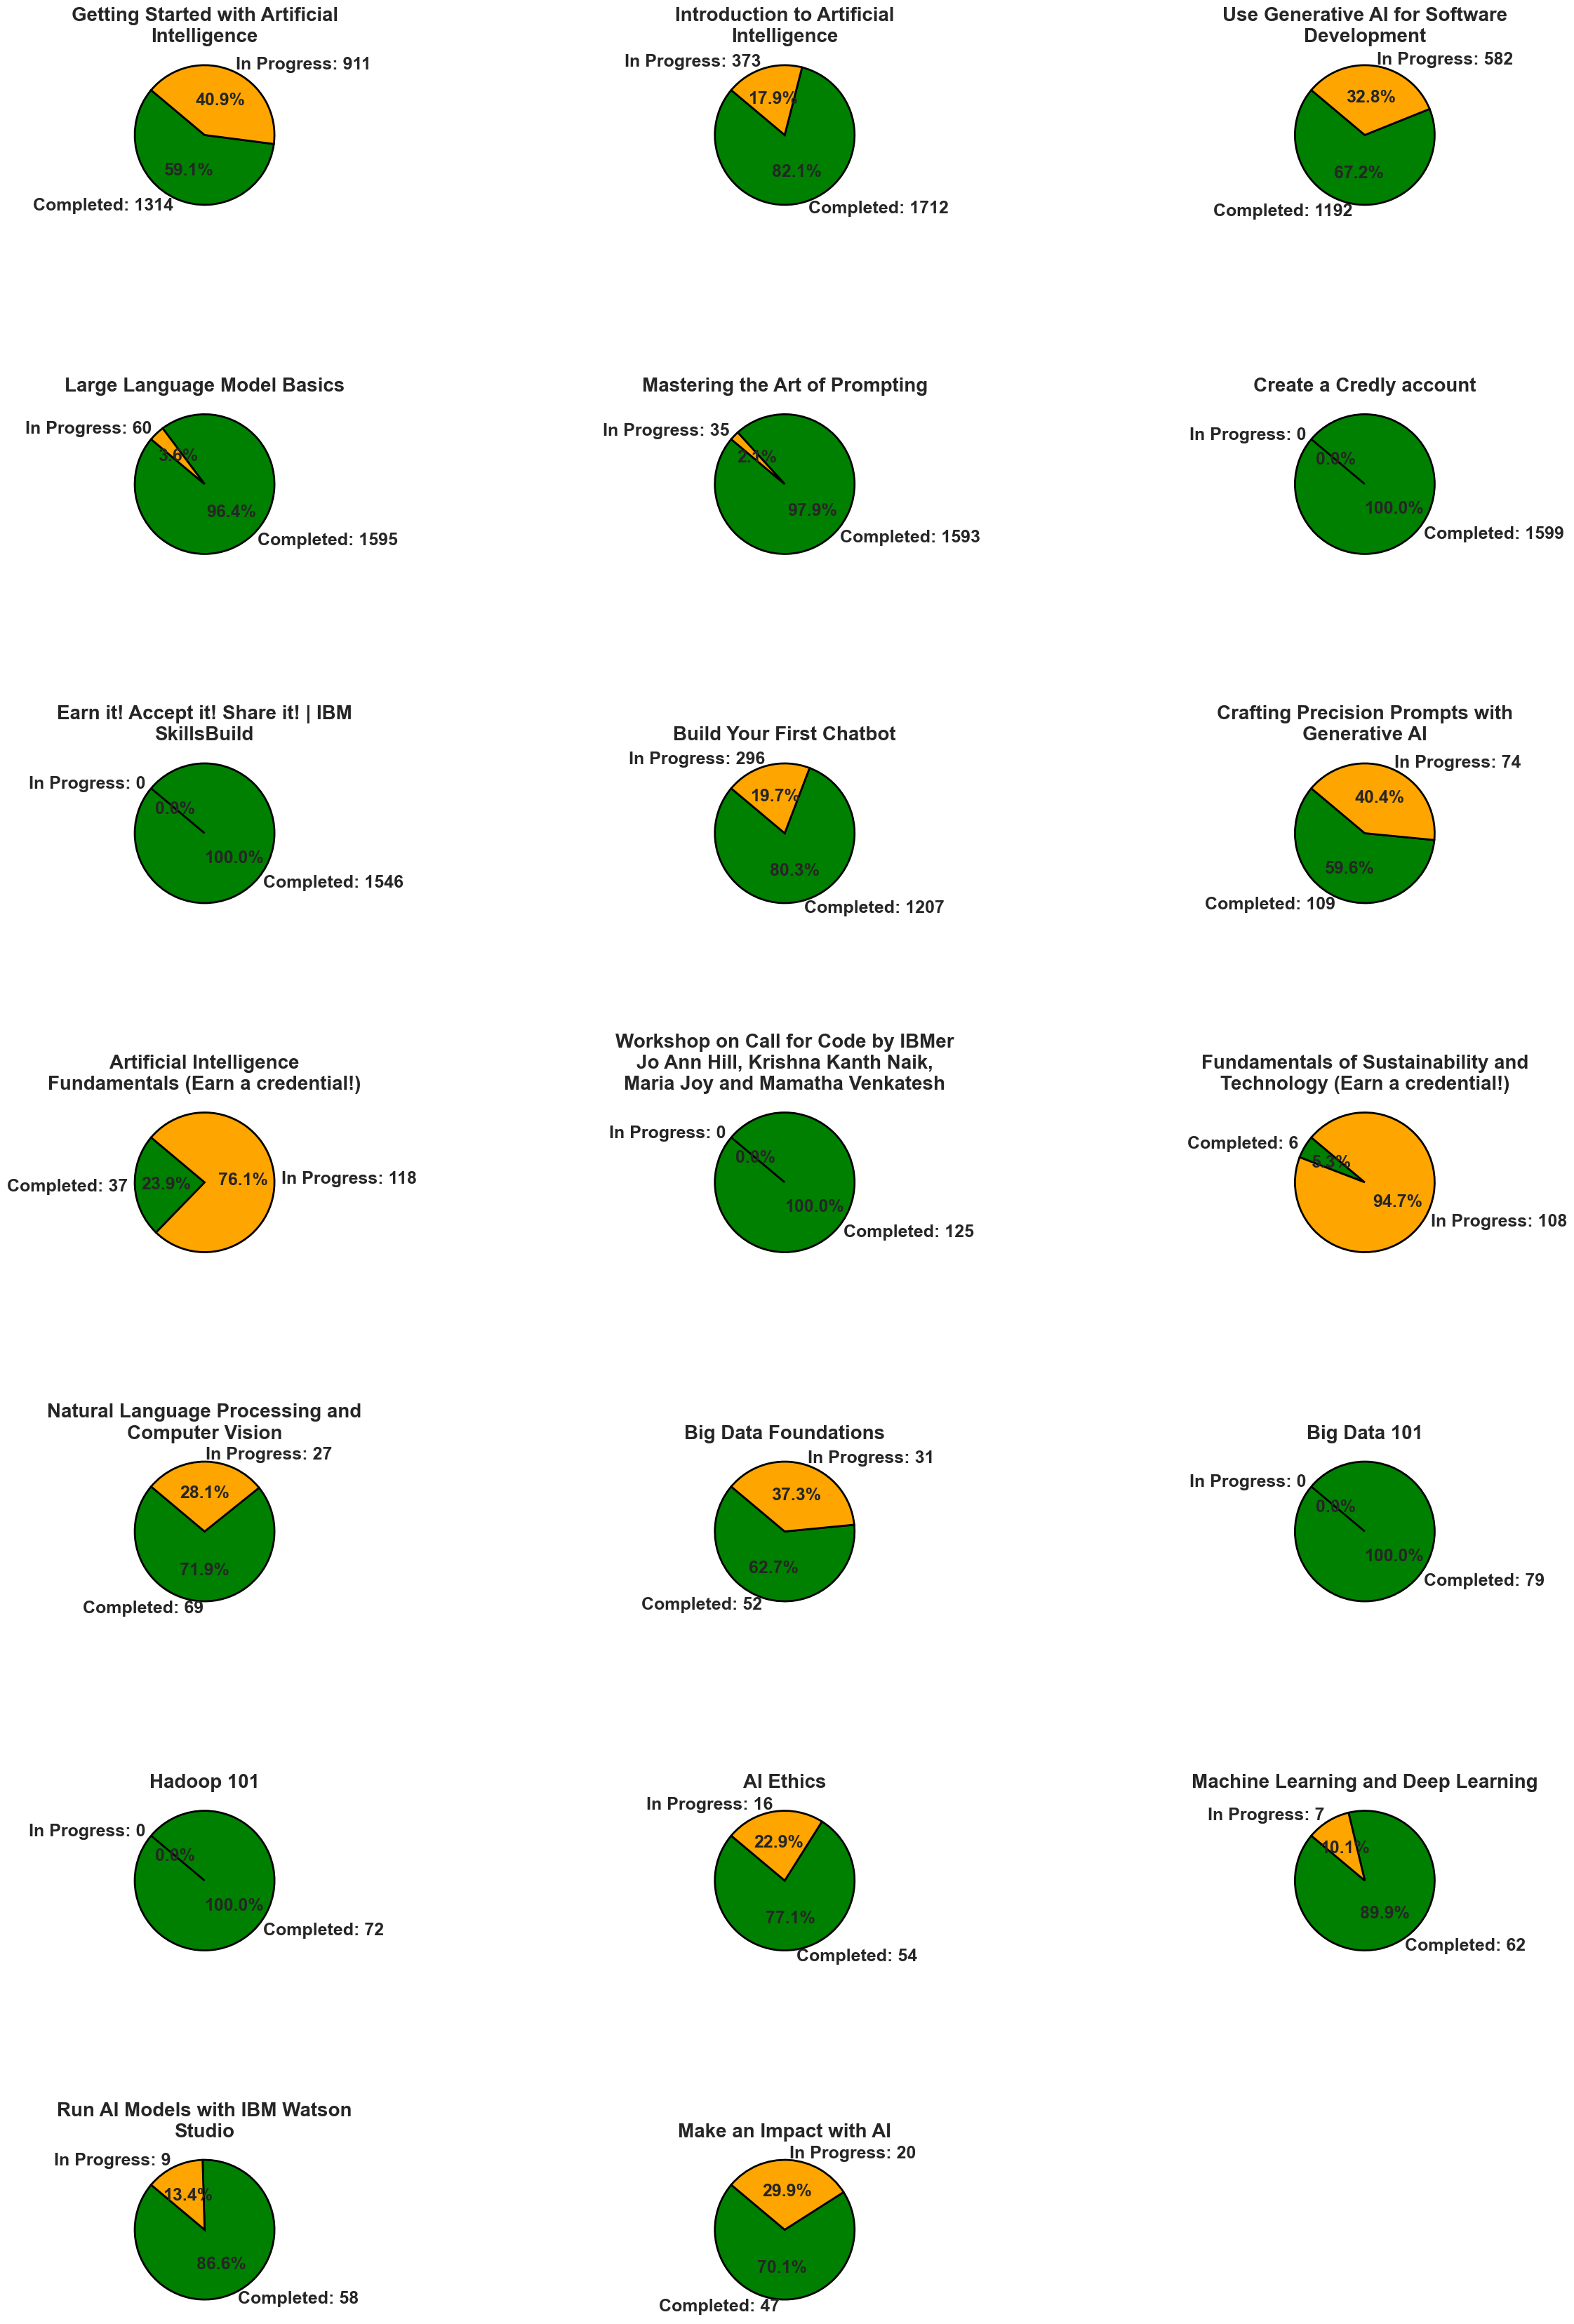

In [36]:
import matplotlib.pyplot as plt
import textwrap

# Select top 20 most frequent learning activities
top_activities = df["Learning activity - Title"].value_counts().index[:20]

# Define color scheme
colors = ["green", "orange"]  # Green for Completed, Orange for In Progress

# Set up subplots for 20 pie charts (7 rows, 3 columns)
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(28, 42))  # Increased figure size for bigger charts

axes = axes.flatten()  # Flatten the axes array to easily loop over

for idx, activity in enumerate(top_activities):
    activity_data = df[df["Learning activity - Title"] == activity]
    
    # Count completed and in-progress users for this activity
    status_counts = activity_data["Transcript status"].value_counts()
    
    # Ensure both categories are always present
    status_counts = status_counts.reindex(["Completed", "In Progress"], fill_value=0)
    
    # Create pie chart with larger font and bigger size
    wedges, texts, autotexts = axes[idx].pie(
        status_counts, 
        labels=[f"{label}: {count}" for label, count in zip(status_counts.index, status_counts)],
        autopct="%.1f%%",
        colors=colors,
        textprops={"fontsize": 18, "fontweight": "bold"},  # Bigger text
        startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2},  # Bolder borders for clarity
        pctdistance=0.55  # Move percentage labels closer to slices
    )
    
    # Wrap long titles into two lines and increase font size
    wrapped_title = "\n".join(textwrap.wrap(activity, width=35))  # Wrap title at 35 characters
    axes[idx].set_title(wrapped_title, fontsize=20, fontweight="bold")

# Hide any extra empty subplots
for i in range(len(top_activities), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=1.0, wspace=0.6)  # Increased spacing

plt.show()


==========================================================================

## Menu for Pie charts

In [39]:
import ipywidgets as widgets
from IPython.display import display

# Select top 20 most frequent learning activities
top_activities = df["Learning activity - Title"].value_counts().index[:20]

# Dropdown widget for user selection
activity_dropdown = widgets.Dropdown(
    options=top_activities,
    description="Activity:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="50%")  # Adjust dropdown width
)

# Function to plot the selected learning activity's pie chart
def plot_pie_chart(activity):
    activity_data = df[df["Learning activity - Title"] == activity]
    
    # Count completed and in-progress users
    status_counts = activity_data["Transcript status"].value_counts()
    
    # Ensure both categories are always present
    status_counts = status_counts.reindex(["Completed", "In Progress"], fill_value=0)
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    colors = ["green", "orange"]
    plt.pie(
        status_counts, 
        labels=[f"{label}\n{count} ({count / sum(status_counts) * 100:.1f}%)" for label, count in zip(status_counts.index, status_counts)],
        autopct="",
        colors=colors,
        textprops={"fontsize": 14},
        startangle=140
    )
    
    # Title
    plt.title(f"Completion Status for\n{activity}", fontsize=16, fontweight="bold")
    
    # Display plot
    plt.show()

# Create an interactive widget
widgets.interactive(plot_pie_chart, activity=activity_dropdown)

interactive(children=(Dropdown(description='Activity:', layout=Layout(width='50%'), options=('Getting Started …

## Seperate excel table with Unique users

In [41]:
import pandas as pd

df = pd.read_excel("sample_data.xlsx")

df["Completion Date"] = pd.to_datetime(df["Completion Date"], format='mixed').dt.tz_localize(None)

df["Quarter"] = df["Completion Date"].dt.to_period("Q")

quarterly_summary = df.pivot_table(
    index="Quarter",
    columns="Transcript status",
    values="Learner - ID",
    aggfunc="nunique",
    fill_value=0
)

quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()

completed_users = df[df["Transcript status"] == "Completed"]
in_progress_users = df[df["Transcript status"] == "In Progress"]

output_filename = "Quarterly_Users_Report.xlsx"

with pd.ExcelWriter(output_filename, engine="xlsxwriter") as writer:
    quarterly_summary.to_excel(writer, sheet_name="Summary")
    completed_users.to_excel(writer, sheet_name="Completed", index=False)
    in_progress_users.to_excel(writer, sheet_name="In Progress", index=False)
    
    workbook = writer.book
    worksheet = writer.sheets["Summary"]

    data_validation = workbook.add_worksheet("Selection")
    data_validation.write_column("A1", ["All Completed", "All In Progress", "All Unique Users"])

    worksheet.data_validation("G2", {
        "validate": "list",
        "source": "='Selection'!$A$1:$A$3",
        "input_message": "Select the user type to view",
        "error_message": "Invalid selection!"
    })

print(f"Excel report generated: {output_filename}")


Excel report generated: Quarterly_Users_Report.xlsx


In [42]:
import pandas as pd

df = pd.read_excel("sample_data.xlsx")

df["Completion Date"] = pd.to_datetime(df["Completion Date"], format='mixed').dt.tz_localize(None)

df["Quarter"] = df["Completion Date"].dt.to_period("Q")

quarterly_summary = df.pivot_table(
    index="Quarter",
    columns="Transcript status",
    values="Learner - ID",
    aggfunc="nunique",
    fill_value=0
)

quarterly_summary["Unique Users"] = df.groupby("Quarter")["Learner - ID"].nunique()

completed_users = df[df["Transcript status"] == "Completed"]
in_progress_users = df[df["Transcript status"] == "In Progress"]

output_filename = "Quarterly_Users_Report_fixed.xlsx"

with pd.ExcelWriter(output_filename, engine="xlsxwriter") as writer:
    quarterly_summary.to_excel(writer, sheet_name="Summary")
    completed_users.to_excel(writer, sheet_name="Completed", index=False)
    in_progress_users.to_excel(writer, sheet_name="In Progress", index=False)
    
    workbook = writer.book
    worksheet = writer.sheets["Summary"]

    data_validation = workbook.add_worksheet("Selection")
    data_validation.write_column("A1", ["All Completed", "All In Progress", "All Unique Users"])

    worksheet.data_validation("G2", {
    "validate": "list",
    "source": "Selection!$A$1:$A$3",  # Remove '=
    "input_message": "Select the user type to view",
    "error_message": "Invalid selection!"
})

print(f"Excel report generated: {output_filename}")


Excel report generated: Quarterly_Users_Report_fixed.xlsx
